In [99]:
import pandas as pd
import re
import pymorphy2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import tqdm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanicdf.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df[df.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [7]:
df.loc[df.Sex=='male','Sex'] = 1
df.loc[df.Sex=='female','Sex'] = 0

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [9]:
df[df.Age.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,1,NaN,0,0,8.4583
17,1,2,1,NaN,0,0,13.0000
19,1,3,0,NaN,0,0,7.2250
26,0,3,1,NaN,0,0,7.2250
28,1,3,0,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292
863,0,3,0,NaN,8,2,69.5500
868,0,3,1,NaN,0,0,9.5000
878,0,3,1,NaN,0,0,7.8958


In [ ]:
#df.groupby(['Pclass','Sex'])['Age'].mean().reset_index().sort_values(by='Sex')

In [10]:
df.fillna(df.Age.median(),inplace = True)

In [11]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [13]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2020)

# Cлучайный лес

In [15]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
display(rfc.score(x_train, y_train))

0.9850299401197605

In [81]:
pred = rfc.predict(x_test)
display(rfc.score(x_test, y_test))

0.7982062780269058

In [86]:
print('Accuracy:',accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))

Accuracy: 0.7982062780269058
Precision: 0.7738095238095238
Recall: 0.7142857142857143
F1: 0.7428571428571429


# Подбор гиперпараметров

In [21]:
%%time
r = 0

for i in ['gini', 'entropy']:
    for j in range(100, 1000, 10):
        for k in range(1, 20):
            rfc_2 = RandomForestClassifier(n_estimators=j, criterion=i, max_depth=k)
            rfc_2.fit(x_train, y_train)
            if r < rfc_2.score(x_test, y_test):
                r = rfc_2.score(x_test, y_test)
                a, b, c = i, j, k
print(r, 'criterion=', a, 'n_estimators=', b, 'max_depth=', c)

0.8295964125560538 criterion= gini n_estimators= 120 max_depth= 11
Wall time: 1h 27min 46s


In [62]:
rfc_2 = RandomForestClassifier(n_estimators=120, criterion='gini', max_depth=11)
rfc_2.fit(x_train, y_train)
display(rfc_2.score(x_test, y_test))

0.8295964125560538

In [70]:
%%time
test_deep = []
for j in range(100, 1000, 10):
    for k in range(1, 20):
        for i in ['gini', 'entropy']:
            rfc_2 = RandomForestClassifier(n_estimators = j, criterion = i, max_depth = k)
            model = rfc_2.fit(x_train, y_train)
            pred = model.predict(x_test)
            test_deep.append([j, i, k, rfc_2.score(x_test, y_test), f1_score(y_test,pred),recall_score(y_test,pred)])

Wall time: 1h 30min 40s


In [71]:
test_deep = pd.DataFrame(test_deep)
test_deep.columns = ['n_estimators','criterion','max_depth','rfc_2.score','f1_score','recall_score']

In [75]:
test_deep.sort_values(by='f1_score',ascending=False).head(10)

,n_estimators,criterion,max_depth,rfc_2.score,f1_score,recall_score
286,170,gini,11,0.834081,0.790960,0.769231
438,210,gini,11,0.829596,0.786517,0.769231
700,280,gini,9,0.829596,0.784091,0.758242
54,110,gini,9,0.834081,0.783626,0.736264
2372,720,gini,9,0.829596,0.781609,0.747253
1080,380,gini,9,0.829596,0.781609,0.747253
2298,700,gini,10,0.825112,0.779661,0.758242
1766,560,gini,10,0.825112,0.779661,0.758242
436,210,gini,10,0.825112,0.779661,0.758242
3132,920,gini,9,0.825112,0.779661,0.758242


# GridSearch

In [76]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11],
             'n_estimators':[120,170,210,280,110,720,380,700,560,920]}

In [79]:
%%time
clf_gs = GridSearchCV(RandomForestClassifier(), tree_para, cv=10, scoring = 'recall')
clf_gs.fit(x_train, y_train)

Wall time: 30min 34s


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'n_estimators': [120, 170, 210, 280, 110, 720, 380,
                                          700, 560, 920]},
             scoring='recall')

In [80]:
clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 920}

In [88]:
model_new = RandomForestClassifier(**clf_gs.best_params_)

In [90]:
model_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=920)

In [91]:
new_pred = model_new.predict(x_test)

In [92]:
print('Accuracy:',accuracy_score(y_test,new_pred))
print('Precision:',precision_score(y_test,new_pred))
print('Recall:',recall_score(y_test,new_pred))
print('F1:',f1_score(y_test,new_pred))

Accuracy: 0.8161434977578476
Precision: 0.7906976744186046
Recall: 0.7472527472527473
F1: 0.7683615819209039


# Кросс-валидация

In [100]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
scores = cross_val_score(model_new, x_train, y_train, cv=cv, scoring='recall')

In [101]:
scores.mean()

0.7537364138522408

In [102]:
scores

array([0.67213115, 0.796875  , 0.71212121, 0.83333333, 0.74576271,
       0.65079365, 0.72463768, 0.77777778, 0.77777778, 0.84615385])

# ROC-AUC

In [104]:
model = rfc.fit(x_train, y_train)
model.predict(x_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [106]:
model.predict_proba(x_test)[:,1]

array([0.89      , 0.99      , 0.95      , 0.97      , 0.01      ,
       0.44      , 0.04533333, 0.99      , 0.        , 0.65      ,
       0.84      , 0.02      , 0.        , 0.83      , 0.31      ,
       0.6       , 0.53      , 0.12817335, 0.        , 0.29      ,
       0.99      , 0.65      , 0.        , 0.70233333, 0.6875    ,
       1.        , 0.08      , 1.        , 0.37535714, 0.        ,
       0.97      , 0.73      , 0.03      , 0.6275    , 0.02      ,
       0.7       , 1.        , 0.01      , 0.        , 0.97      ,
       0.93      , 0.02      , 0.09      , 0.00587302, 0.37055556,
       0.4       , 0.51      , 0.19      , 0.        , 0.38      ,
       0.        , 0.        , 0.83049928, 0.01      , 0.75      ,
       0.2       , 0.96      , 0.05      , 0.        , 0.99      ,
       0.12      , 0.02      , 0.30666667, 0.        , 0.48      ,
       0.08      , 0.        , 0.01      , 0.26      , 0.14416667,
       0.81260642, 0.93      , 0.15      , 0.38716667, 0.48   

In [107]:
pred_proba = model.predict_proba(x_test)[:,1]

In [108]:
fpr, tpr, treshold = roc_curve(y_test, pred_proba)
tree_auc = roc_auc_score(y_test, pred_proba)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.864


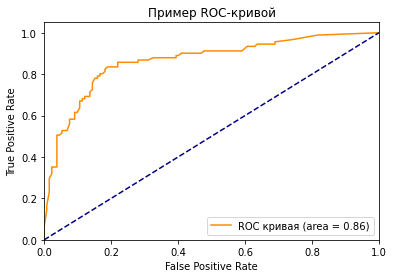

In [109]:
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()